


# Classification_CNN

## Method

Build Convolutional Neural Network model with Tensorflow-Keras.

```
X_train: 50000 samples
X_test: 10000 samples

batch_size: 128
epochs: 100
```

In [20]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [68]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

## Load dataset, Preprocessing

In [21]:
from tensorflow.keras import utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, BatchNormalization, Convolution2D, MaxPooling2D, Flatten

In [22]:
output_dim = nb_classes = 10
input_dim = (32,32,3)

In [23]:
print(X_train.shape, X_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [24]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
Y_train = utils.to_categorical(y_train, nb_classes)
Y_test = utils.to_categorical(y_test, nb_classes)

In [34]:
print(input_dim, X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, output_dim)

(32, 32, 3) (50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10) 10


## Build Model

## arch 3 large param (from DEC13)

In [9]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu'))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 1, activation='relu'))

model.add(Convolution2D(256,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 4))

model.add(Flatten())
model.add(Activation('softmax'))


In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        1

In [11]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
batch_size=128
epochs=100
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test error:', score[0]) 
print('Test accuracy:', score[1])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 65s 1ms/sample - loss: 1.5786 - accuracy: 0.4507 - val_loss: 1.3804 - val_accuracy: 0.5125
Epoch 2/100
50000/50000 [==============================] - 59s 1ms/sample - loss: 1.1060 - accuracy: 0.6114 - val_loss: 1.3714 - val_accuracy: 0.5448
Epoch 3/100
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.9292 - accuracy: 0.6753 - val_loss: 1.0764 - val_accuracy: 0.6262
Epoch 4/100
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.8119 - accuracy: 0.7174 - val_loss: 1.0816 - val_accuracy: 0.6237
Epoch 5/100
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.7203 - accuracy: 0.7519 - val_loss: 1.0177 - val_accuracy: 0.6557
Epoch 6/100
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.6402 - accuracy: 0.7798 - val_loss: 1.0469 - val_accuracy: 0.6598
Epoch 7/100
50000/50000 [=========================

Epoch 55/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0062 - accuracy: 1.0000 - val_loss: 1.3258 - val_accuracy: 0.7143
Epoch 56/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0059 - accuracy: 1.0000 - val_loss: 1.3341 - val_accuracy: 0.7121
Epoch 57/100
50000/50000 [==============================] - 58s 1ms/sample - loss: 0.0058 - accuracy: 1.0000 - val_loss: 1.3366 - val_accuracy: 0.7133
Epoch 58/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0056 - accuracy: 1.0000 - val_loss: 1.3401 - val_accuracy: 0.7151
Epoch 59/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0055 - accuracy: 1.0000 - val_loss: 1.3439 - val_accuracy: 0.7135
Epoch 60/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0053 - accuracy: 1.0000 - val_loss: 1.3446 - val_accuracy: 0.7120
Epoch 61/100
50000/50000 [==============================] - 57s 1ms/sample - loss: 0.0051 - ac

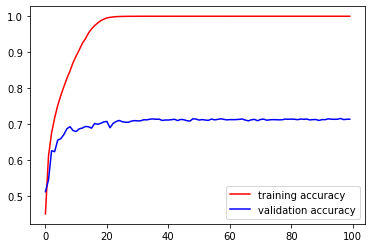

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

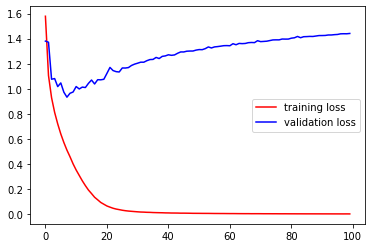

In [26]:
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [48]:
predictions = model.predict_classes(X_test)

## arch 1 image augmentation

```python
{
    horizontal_flip: True
}
```

In [46]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu'))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 1, activation='relu'))

model.add(Convolution2D(256,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 4))

model.add(Flatten())
model.add(Activation('softmax'))


In [47]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_10 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_11 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 64)       

In [48]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [42]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [49]:
datagen = ImageDataGenerator(
    horizontal_flip=True
)

In [ ]:
batch_size=128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 104s 266ms/step - loss: 1.6366 - accuracy: 0.4322 - val_loss: 1.4235 - val_accuracy: 0.4934
Epoch 2/50
390/390 [==============================] - 103s 265ms/step - loss: 1.1883 - accuracy: 0.5818 - val_loss: 1.1919 - val_accuracy: 0.5852
Epoch 3/50
390/390 [==============================] - 106s 271ms/step - loss: 1.0168 - accuracy: 0.6425 - val_loss: 1.0603 - val_accuracy: 0.6283
Epoch 4/50
390/390 [==============================] - 104s 266ms/step - loss: 0.9050 - accuracy: 0.6849 - val_loss: 0.9647 - val_accuracy: 0.6619
Epoch 5/50
390/390 [==============================] - 104s 266ms/step - loss: 0.8236 - accuracy: 0.7127 - val_loss: 0.9540 - val_accuracy: 0.6682
Epoch 6/50
390/390 [==============================] - 103s 264ms/step - loss: 0.7645 - accuracy: 0.7347 - val_loss: 0.8745 - val_accuracy: 0.7029
Epoch 7/50
390/390 [==============================] - 107s 274ms/step - loss: 0.7111 - accuracy: 0.7555 - val_loss: 0.8894 -

## arch 2 image augmentation

```python
{
    horizontal_flip: True,
    rotation_range: 10,
    zoom_range: 0.15,
    width_shift_range: 0.2
}
```

In [54]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu'))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 1, activation='relu'))

model.add(Convolution2D(256,(3,3), activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 4))

model.add(Flatten())
model.add(Activation('softmax'))


In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_15 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_16 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 64)       

In [56]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,###
    zoom_range=0.15,
    width_shift_range=0.2
)

In [59]:
batch_size=128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 111s 284ms/step - loss: 1.6987 - accuracy: 0.4073 - val_loss: 1.5358 - val_accuracy: 0.4693
Epoch 2/50
390/390 [==============================] - 108s 277ms/step - loss: 1.3453 - accuracy: 0.5205 - val_loss: 1.3489 - val_accuracy: 0.5314
Epoch 3/50
390/390 [==============================] - 110s 282ms/step - loss: 1.2170 - accuracy: 0.5695 - val_loss: 1.3263 - val_accuracy: 0.5525
Epoch 4/50
390/390 [==============================] - 107s 275ms/step - loss: 1.1330 - accuracy: 0.5968 - val_loss: 1.3577 - val_accuracy: 0.5570
Epoch 5/50
390/390 [==============================] - 108s 277ms/step - loss: 1.0703 - accuracy: 0.6252 - val_loss: 1.2779 - val_accuracy: 0.5935
Epoch 6/50
390/390 [==============================] - 107s 275ms/step - loss: 1.0257 - accuracy: 0.6384 - val_loss: 1.2175 - val_accuracy: 0.5972
Epoch 7/50
390/390 [==============================] - 108s 276ms/step - loss: 0.9811 - accuracy: 0.6540 - val_loss: 1.0934 -

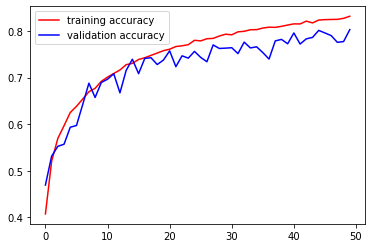

In [60]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

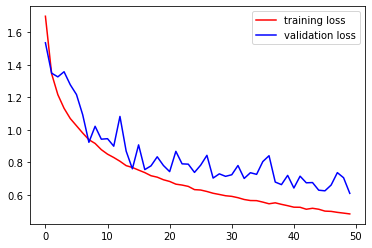

In [61]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [62]:
y_pred = model.predict_classes(X_test)

In [72]:
score = accuracy_score(y_test, y_pred)
score

0.8031

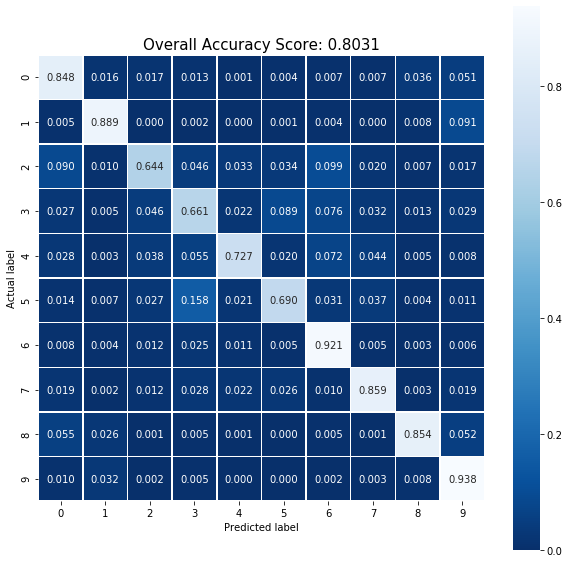

In [71]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionMatrix_CNN_image_augmentation_4.png')
plt.show();

## arch 3 image augmentation + L2 regularization 0.1

```python
{
    horizontal_flip: True,
    rotation_range: 10,
    zoom_range: 0.15,
    width_shift_range: 0.2
}
```

In [73]:
from tensorflow.keras import regularizers

In [74]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.1), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.1)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.1)))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.1)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.1)))
model.add(BatchNormalization())

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.1)))

model.add(Flatten())
model.add(Activation('softmax'))


In [75]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_20 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_21 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 15, 15, 64)       

In [76]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [78]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2
)

In [79]:
batch_size=128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 116s 296ms/step - loss: 21.0013 - accuracy: 0.4195 - val_loss: 10.7957 - val_accuracy: 0.1385
Epoch 2/50
390/390 [==============================] - 113s 290ms/step - loss: 5.5066 - accuracy: 0.5334 - val_loss: 3.9733 - val_accuracy: 0.2350
Epoch 3/50
390/390 [==============================] - 113s 291ms/step - loss: 2.3035 - accuracy: 0.5788 - val_loss: 2.3215 - val_accuracy: 0.4415
Epoch 4/50
390/390 [==============================] - 113s 289ms/step - loss: 1.6297 - accuracy: 0.6014 - val_loss: 1.6456 - val_accuracy: 0.5649
Epoch 5/50
390/390 [==============================] - 113s 289ms/step - loss: 1.4541 - accuracy: 0.6245 - val_loss: 1.8444 - val_accuracy: 0.5258
Epoch 6/50
390/390 [==============================] - 114s 292ms/step - loss: 1.3964 - accuracy: 0.6381 - val_loss: 1.3995 - val_accuracy: 0.6272
Epoch 7/50
390/390 [==============================] - 113s 290ms/step - loss: 1.3724 - accuracy: 0.6478 - val_loss: 1.5272

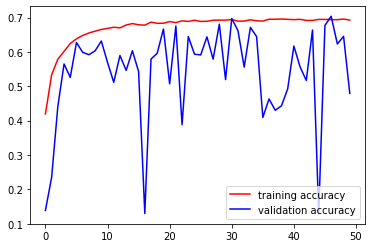

In [80]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

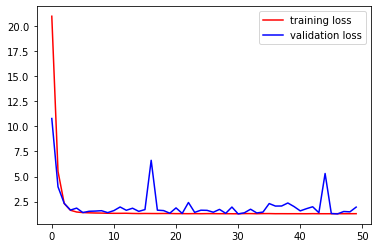

In [81]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [82]:
y_pred = model.predict_classes(X_test)

In [83]:
score = accuracy_score(y_test, y_pred)
score

0.4792

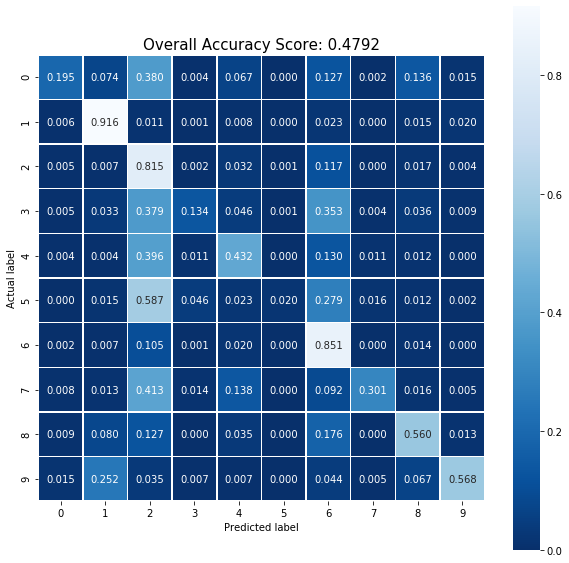

In [85]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionMatrix_CNN_image_augmentation_4_L2_0.1.png')
plt.show();

## arch 4 image augmentation + L2 regularization 0.01

```python
{
    horizontal_flip: True,
    rotation_range: 10,
    zoom_range: 0.15,
    width_shift_range: 0.2
}
```

In [73]:
from tensorflow.keras import regularizers

In [86]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.01)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.01)))

model.add(Flatten())
model.add(Activation('softmax'))


In [87]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_25 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_26 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 15, 15, 64)       

In [88]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [89]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2
)

In [90]:
batch_size=128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 117s 300ms/step - loss: 5.2689 - accuracy: 0.3941 - val_loss: 4.8828 - val_accuracy: 0.4218
Epoch 2/50
390/390 [==============================] - 113s 291ms/step - loss: 4.3952 - accuracy: 0.5173 - val_loss: 4.1052 - val_accuracy: 0.5421
Epoch 3/50
390/390 [==============================] - 116s 297ms/step - loss: 3.8204 - accuracy: 0.5725 - val_loss: 3.5990 - val_accuracy: 0.5817
Epoch 4/50
390/390 [==============================] - 114s 292ms/step - loss: 3.3507 - accuracy: 0.6101 - val_loss: 3.2751 - val_accuracy: 0.5876
Epoch 5/50
390/390 [==============================] - 112s 288ms/step - loss: 2.9608 - accuracy: 0.6396 - val_loss: 2.7679 - val_accuracy: 0.6596
Epoch 6/50
390/390 [==============================] - 115s 296ms/step - loss: 2.6364 - accuracy: 0.6629 - val_loss: 2.5275 - val_accuracy: 0.6624
Epoch 7/50
390/390 [==============================] - 114s 291ms/step - loss: 2.3611 - accuracy: 0.6806 - val_loss: 2.4026 -

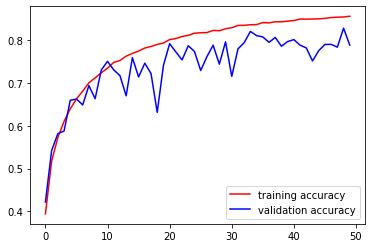

In [91]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

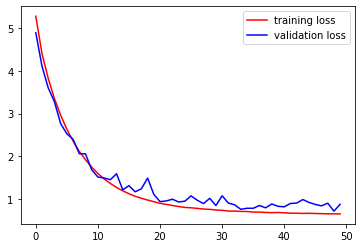

In [92]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [82]:
y_pred = model.predict_classes(X_test)

In [83]:
score = accuracy_score(y_test, y_pred)
score

0.4792

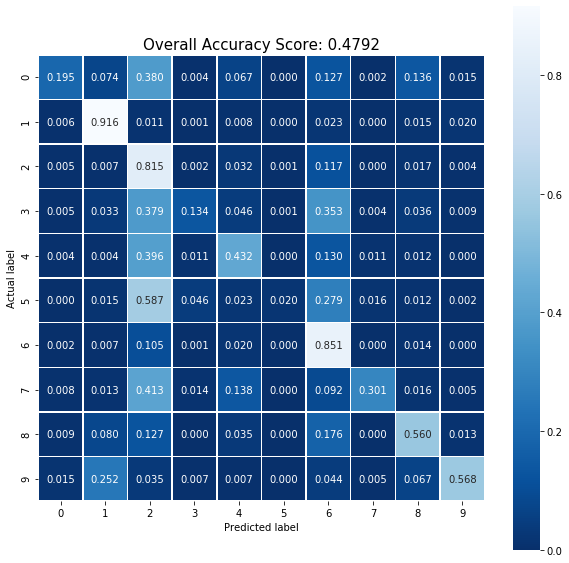

In [84]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionMatrix_CNN_image_augmentation_4_L2_0.01.png')
plt.show();

# -------------------------------------- 

## arch 5 image augmentation + L2 regularization 0.001

```python
{
    horizontal_flip: True,
    rotation_range: 10,
    zoom_range: 0.15,
    width_shift_range: 0.2
}
```

In [93]:
from tensorflow.keras import regularizers

In [94]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.001)))

model.add(Flatten())
model.add(Activation('softmax'))


In [95]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_48 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_30 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_31 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 15, 15, 64)       

In [96]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [97]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [98]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2
)

In [99]:
batch_size=128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 114s 293ms/step - loss: 2.0482 - accuracy: 0.4150 - val_loss: 1.9078 - val_accuracy: 0.4631
Epoch 2/50
390/390 [==============================] - 112s 288ms/step - loss: 1.7109 - accuracy: 0.5253 - val_loss: 1.9166 - val_accuracy: 0.4995
Epoch 3/50
390/390 [==============================] - 111s 284ms/step - loss: 1.5878 - accuracy: 0.5678 - val_loss: 1.5982 - val_accuracy: 0.5734
Epoch 4/50
390/390 [==============================] - 111s 283ms/step - loss: 1.4946 - accuracy: 0.6004 - val_loss: 1.6178 - val_accuracy: 0.5778
Epoch 5/50
390/390 [==============================] - 111s 284ms/step - loss: 1.4252 - accuracy: 0.6238 - val_loss: 1.5018 - val_accuracy: 0.6099
Epoch 6/50
390/390 [==============================] - 111s 284ms/step - loss: 1.3682 - accuracy: 0.6444 - val_loss: 1.3452 - val_accuracy: 0.6634
Epoch 7/50
390/390 [==============================] - 115s 294ms/step - loss: 1.3127 - accuracy: 0.6622 - val_loss: 1.5202 -

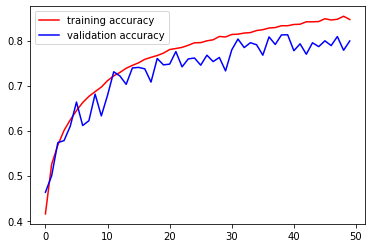

In [100]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

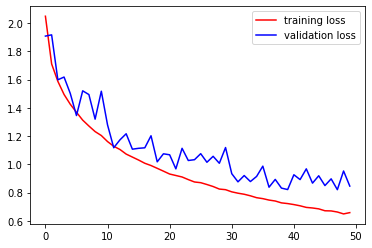

In [101]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [102]:
y_pred = model.predict_classes(X_test)

In [103]:
score = accuracy_score(y_test, y_pred)
score

0.7991

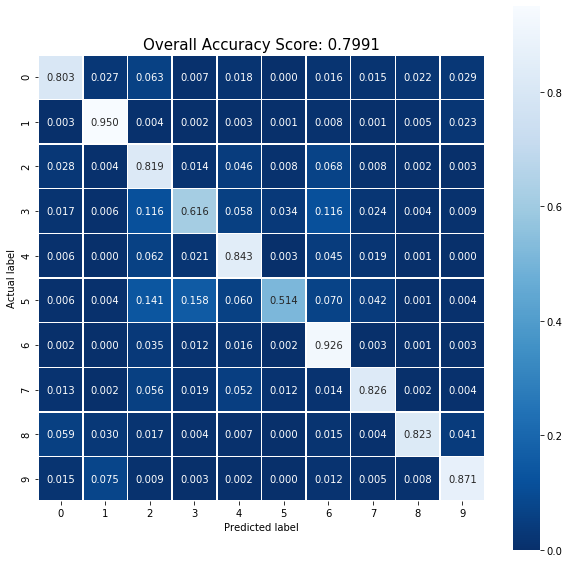

In [104]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionMatrix_CNN_image_augmentation_4_L2_0.001.png')
plt.show();

## arch 6 image augmentation + L2 regularization 0.0001

```python
{
    horizontal_flip: True,
    rotation_range: 10,
    zoom_range: 0.15,
    width_shift_range: 0.2
}
```

In [105]:
from tensorflow.keras import regularizers

In [106]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.0001)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001)))
model.add(BatchNormalization())

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.0001)))

model.add(Flatten())
model.add(Activation('softmax'))


In [107]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_56 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_35 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_36 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 15, 15, 64)       

In [108]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [109]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [110]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2
)

In [111]:
batch_size=128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=50,
    validation_data=(X_test, Y_test),
)

Epoch 1/50
390/390 [==============================] - 110s 281ms/step - loss: 1.6971 - accuracy: 0.4173 - val_loss: 1.4667 - val_accuracy: 0.4862
Epoch 2/50
390/390 [==============================] - 110s 281ms/step - loss: 1.3871 - accuracy: 0.5195 - val_loss: 1.3667 - val_accuracy: 0.5371
Epoch 3/50
390/390 [==============================] - 109s 280ms/step - loss: 1.2746 - accuracy: 0.5617 - val_loss: 1.3367 - val_accuracy: 0.5642
Epoch 4/50
390/390 [==============================] - 109s 280ms/step - loss: 1.1878 - accuracy: 0.5943 - val_loss: 1.3479 - val_accuracy: 0.5605
Epoch 5/50
390/390 [==============================] - 109s 280ms/step - loss: 1.1300 - accuracy: 0.6146 - val_loss: 1.1425 - val_accuracy: 0.6278
Epoch 6/50
390/390 [==============================] - 110s 281ms/step - loss: 1.0801 - accuracy: 0.6307 - val_loss: 1.1622 - val_accuracy: 0.6220
Epoch 7/50
390/390 [==============================] - 110s 282ms/step - loss: 1.0256 - accuracy: 0.6513 - val_loss: 1.1999 -

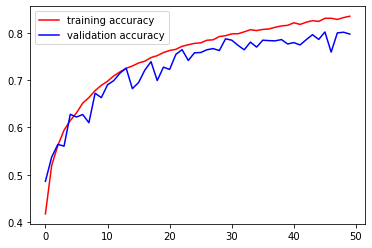

In [112]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

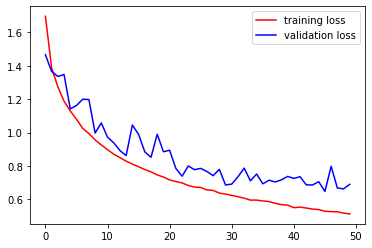

In [113]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [114]:
y_pred = model.predict_classes(X_test)

In [115]:
score = accuracy_score(y_test, y_pred)
score

0.7973

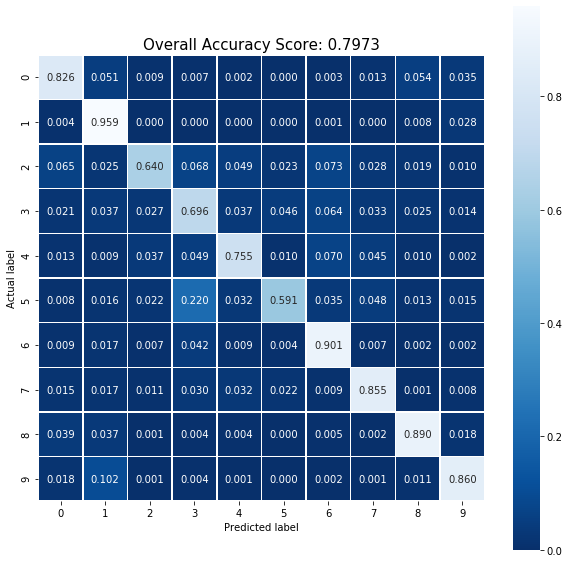

In [116]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionMatrix_CNN_image_augmentation_4_L2_0.0001.png')
plt.show();

## arch 7 image augmentation + L2 regularization 0.001 + 500 epochs

```python
{
    horizontal_flip: True,
    rotation_range: 10,
    zoom_range: 0.15,
    width_shift_range: 0.2
}
```

In [117]:
from tensorflow.keras import regularizers

In [118]:
model = Sequential()

# 32,32
model.add(Convolution2D(16,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(32,32,3), padding='same'))
model.add(BatchNormalization())

# 30,30
model.add(Convolution2D(32,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

# 28,28
model.add(MaxPooling2D(pool_size=(2,2)))

# # 14,14
model.add(Convolution2D(24,1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

# 14,14
model.add(Convolution2D(64,(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

# 12, 12
model.add(Convolution2D(128,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64, 1, activation='relu', kernel_regularizer=regularizers.l2(0.001)))

model.add(Convolution2D(256,(3,3), activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(BatchNormalization())

model.add(Convolution2D(10, 4, kernel_regularizer=regularizers.l2(0.001)))

model.add(Flatten())
model.add(Activation('softmax'))


In [119]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 16)        64        
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 30, 30, 32)        4640      
_________________________________________________________________
batch_normalization_41 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_66 (Conv2D)           (None, 15, 15, 24)        792       
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 15, 15, 64)       

In [120]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [122]:
datagen = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.2
)

In [ ]:
batch_size=128
model_info = model.fit_generator(
    datagen.flow(X_train, Y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=500,
    validation_data=(X_test, Y_test),
)

Epoch 1/500
390/390 [==============================] - 109s 281ms/step - loss: 2.0599 - accuracy: 0.4107 - val_loss: 1.8859 - val_accuracy: 0.4693
Epoch 2/500
390/390 [==============================] - 109s 281ms/step - loss: 1.7205 - accuracy: 0.5219 - val_loss: 1.9937 - val_accuracy: 0.4844
Epoch 3/500
390/390 [==============================] - 109s 281ms/step - loss: 1.5905 - accuracy: 0.5688 - val_loss: 1.6765 - val_accuracy: 0.5591
Epoch 4/500
390/390 [==============================] - 110s 281ms/step - loss: 1.4974 - accuracy: 0.6016 - val_loss: 1.4793 - val_accuracy: 0.6142
Epoch 5/500
390/390 [==============================] - 110s 281ms/step - loss: 1.4271 - accuracy: 0.6250 - val_loss: 1.5261 - val_accuracy: 0.5974
Epoch 6/500
390/390 [==============================] - 109s 281ms/step - loss: 1.3700 - accuracy: 0.6446 - val_loss: 1.4851 - val_accuracy: 0.6282
Epoch 7/500
390/390 [==============================] - 110s 281ms/step - loss: 1.3220 - accuracy: 0.6601 - val_loss: 1

390/390 [==============================] - 109s 280ms/step - loss: 0.4205 - accuracy: 0.9060 - val_loss: 0.7117 - val_accuracy: 0.8322
Epoch 112/500
390/390 [==============================] - 110s 281ms/step - loss: 0.4246 - accuracy: 0.9067 - val_loss: 0.6748 - val_accuracy: 0.8395
Epoch 113/500
390/390 [==============================] - 109s 280ms/step - loss: 0.4124 - accuracy: 0.9097 - val_loss: 0.6957 - val_accuracy: 0.8390
Epoch 114/500
390/390 [==============================] - 109s 280ms/step - loss: 0.4117 - accuracy: 0.9093 - val_loss: 0.7909 - val_accuracy: 0.8077
Epoch 115/500
390/390 [==============================] - 110s 281ms/step - loss: 0.4105 - accuracy: 0.9108 - val_loss: 0.6461 - val_accuracy: 0.8505
Epoch 116/500
390/390 [==============================] - 110s 281ms/step - loss: 0.4098 - accuracy: 0.9098 - val_loss: 0.6621 - val_accuracy: 0.8461
Epoch 117/500
390/390 [==============================] - 109s 280ms/step - loss: 0.4041 - accuracy: 0.9119 - val_loss: 0

390/390 [==============================] - 109s 280ms/step - loss: 0.3417 - accuracy: 0.9282 - val_loss: 0.6705 - val_accuracy: 0.8467
Epoch 167/500
390/390 [==============================] - 109s 280ms/step - loss: 0.3437 - accuracy: 0.9283 - val_loss: 0.6731 - val_accuracy: 0.8454
Epoch 168/500
390/390 [==============================] - 110s 281ms/step - loss: 0.3427 - accuracy: 0.9290 - val_loss: 0.6205 - val_accuracy: 0.8632
Epoch 169/500
390/390 [==============================] - 109s 280ms/step - loss: 0.3345 - accuracy: 0.9321 - val_loss: 0.6706 - val_accuracy: 0.8445
Epoch 170/500
390/390 [==============================] - 109s 280ms/step - loss: 0.3428 - accuracy: 0.9280 - val_loss: 0.6996 - val_accuracy: 0.8395
Epoch 171/500
390/390 [==============================] - 109s 281ms/step - loss: 0.3418 - accuracy: 0.9286 - val_loss: 0.7535 - val_accuracy: 0.8222
Epoch 172/500
390/390 [==============================] - 109s 280ms/step - loss: 0.3368 - accuracy: 0.9298 - val_loss: 0

390/390 [==============================] - 109s 280ms/step - loss: 0.3046 - accuracy: 0.9413 - val_loss: 0.6216 - val_accuracy: 0.8585
Epoch 222/500
390/390 [==============================] - 109s 280ms/step - loss: 0.3099 - accuracy: 0.9373 - val_loss: 0.6922 - val_accuracy: 0.8502
Epoch 223/500
390/390 [==============================] - 109s 280ms/step - loss: 0.3038 - accuracy: 0.9404 - val_loss: 0.6552 - val_accuracy: 0.8478
Epoch 224/500
390/390 [==============================] - 109s 280ms/step - loss: 0.3005 - accuracy: 0.9418 - val_loss: 0.6608 - val_accuracy: 0.8510
Epoch 225/500
390/390 [==============================] - 109s 281ms/step - loss: 0.3073 - accuracy: 0.9390 - val_loss: 0.6958 - val_accuracy: 0.8508
Epoch 226/500
390/390 [==============================] - 109s 281ms/step - loss: 0.3046 - accuracy: 0.9410 - val_loss: 0.6881 - val_accuracy: 0.8473
Epoch 227/500
390/390 [==============================] - 109s 280ms/step - loss: 0.3084 - accuracy: 0.9383 - val_loss: 0

390/390 [==============================] - 110s 282ms/step - loss: 0.2861 - accuracy: 0.9453 - val_loss: 0.5883 - val_accuracy: 0.8659
Epoch 277/500
390/390 [==============================] - 109s 280ms/step - loss: 0.2842 - accuracy: 0.9467 - val_loss: 0.7048 - val_accuracy: 0.8468
Epoch 278/500
390/390 [==============================] - 109s 281ms/step - loss: 0.2877 - accuracy: 0.9462 - val_loss: 0.6291 - val_accuracy: 0.8538
Epoch 279/500
390/390 [==============================] - 109s 280ms/step - loss: 0.2888 - accuracy: 0.9445 - val_loss: 0.7404 - val_accuracy: 0.8354
Epoch 280/500
390/390 [==============================] - 109s 280ms/step - loss: 0.2836 - accuracy: 0.9466 - val_loss: 0.7674 - val_accuracy: 0.8370
Epoch 281/500
390/390 [==============================] - 109s 280ms/step - loss: 0.2892 - accuracy: 0.9446 - val_loss: 0.7080 - val_accuracy: 0.8475
Epoch 282/500
390/390 [==============================] - 109s 280ms/step - loss: 0.2880 - accuracy: 0.9452 - val_loss: 0

390/390 [==============================] - 112s 287ms/step - loss: 0.2745 - accuracy: 0.9499 - val_loss: 0.7185 - val_accuracy: 0.8433
Epoch 332/500
390/390 [==============================] - 113s 291ms/step - loss: 0.2728 - accuracy: 0.9506 - val_loss: 0.6861 - val_accuracy: 0.8568
Epoch 333/500
390/390 [==============================] - 114s 292ms/step - loss: 0.2720 - accuracy: 0.9499 - val_loss: 0.7373 - val_accuracy: 0.8420
Epoch 334/500
390/390 [==============================] - 113s 291ms/step - loss: 0.2694 - accuracy: 0.9522 - val_loss: 0.6462 - val_accuracy: 0.8587
Epoch 335/500
390/390 [==============================] - 113s 289ms/step - loss: 0.2732 - accuracy: 0.9501 - val_loss: 0.7015 - val_accuracy: 0.8469
Epoch 336/500
390/390 [==============================] - 111s 286ms/step - loss: 0.2731 - accuracy: 0.9498 - val_loss: 0.6470 - val_accuracy: 0.8630
Epoch 337/500
390/390 [==============================] - 111s 285ms/step - loss: 0.2729 - accuracy: 0.9503 - val_loss: 0

390/390 [==============================] - 111s 285ms/step - loss: 0.2605 - accuracy: 0.9536 - val_loss: 0.7244 - val_accuracy: 0.8448
Epoch 387/500
390/390 [==============================] - 113s 289ms/step - loss: 0.2627 - accuracy: 0.9525 - val_loss: 0.7320 - val_accuracy: 0.8400
Epoch 388/500
390/390 [==============================] - 110s 281ms/step - loss: 0.2590 - accuracy: 0.9551 - val_loss: 0.7197 - val_accuracy: 0.8470
Epoch 389/500
390/390 [==============================] - 109s 281ms/step - loss: 0.2637 - accuracy: 0.9530 - val_loss: 0.6643 - val_accuracy: 0.8647
Epoch 390/500
390/390 [==============================] - 109s 281ms/step - loss: 0.2636 - accuracy: 0.9516 - val_loss: 0.7211 - val_accuracy: 0.8525
Epoch 391/500
390/390 [==============================] - 109s 281ms/step - loss: 0.2630 - accuracy: 0.9542 - val_loss: 0.7936 - val_accuracy: 0.8417
Epoch 392/500
390/390 [==============================] - 109s 280ms/step - loss: 0.2643 - accuracy: 0.9529 - val_loss: 0

In [ ]:
import matplotlib.pyplot as plt
plt.plot(model_info.history['accuracy'],'r')
plt.plot(model_info.history['val_accuracy'],'b')
plt.legend({'training accuracy':'r', 'validation accuracy': 'b'})
plt.show()

In [ ]:
plt.plot(model_info.history['loss'],'r')
plt.plot(model_info.history['val_loss'],'b')
plt.legend({'training loss':'r', 'validation loss': 'b'})
plt.show()

In [ ]:
y_pred = model.predict_classes(X_test)

In [ ]:
score = accuracy_score(y_test, y_pred)
score

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Overall Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('ConfusionMatrix_CNN_image_augmentation_4_L2_0.001_500epochs.png')
plt.show();